#### Decision Tree

1. A Decision Tree to predict the house prices.
2. Compare between Decision Tree and Random Forest Model (Which one is best for te prediction ?).

In [13]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#Loading the DataSet
data = pd.read_csv("Real estate.csv")
data.head(20)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [14]:
#Data set information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [15]:
#Checking for null values
null_values = data.isnull().sum()
null_values

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

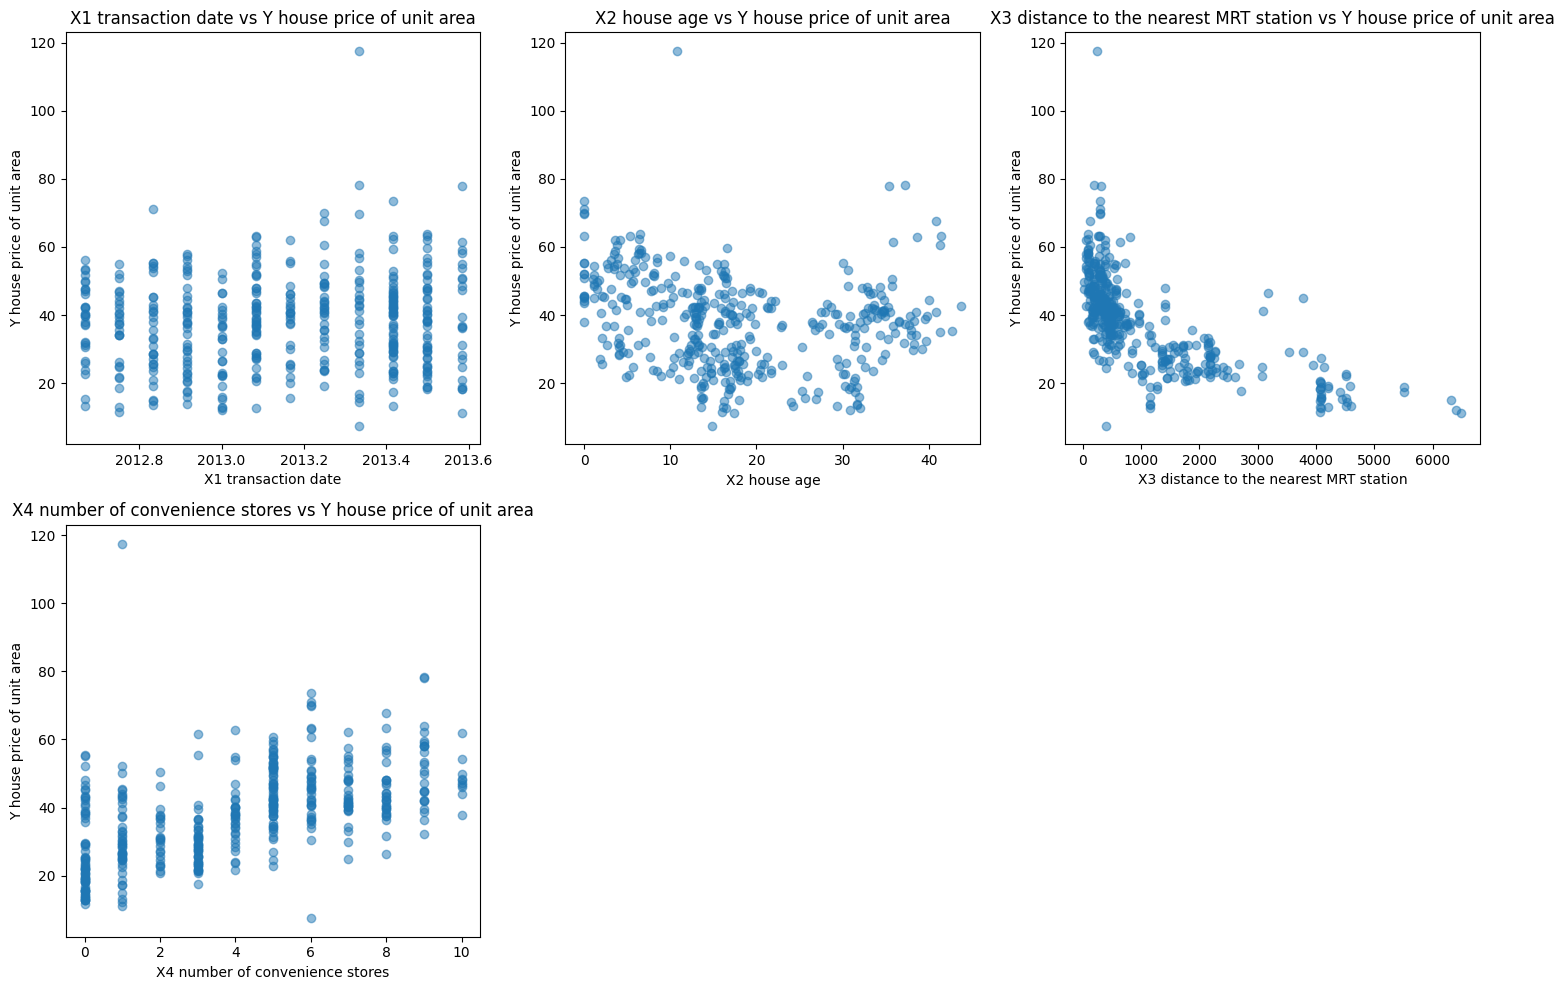

In [16]:
#Scatter Plots to identify if there is any Varaible(Feature of the Dataset with a High number of Outliers)

features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
            'X4 number of convenience stores']
target = 'Y house price of unit area'

# Create scatter plots for each feature against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], data[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10720\2950782846.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_house_price = data.groupby(distance_ranges)[target].mean()


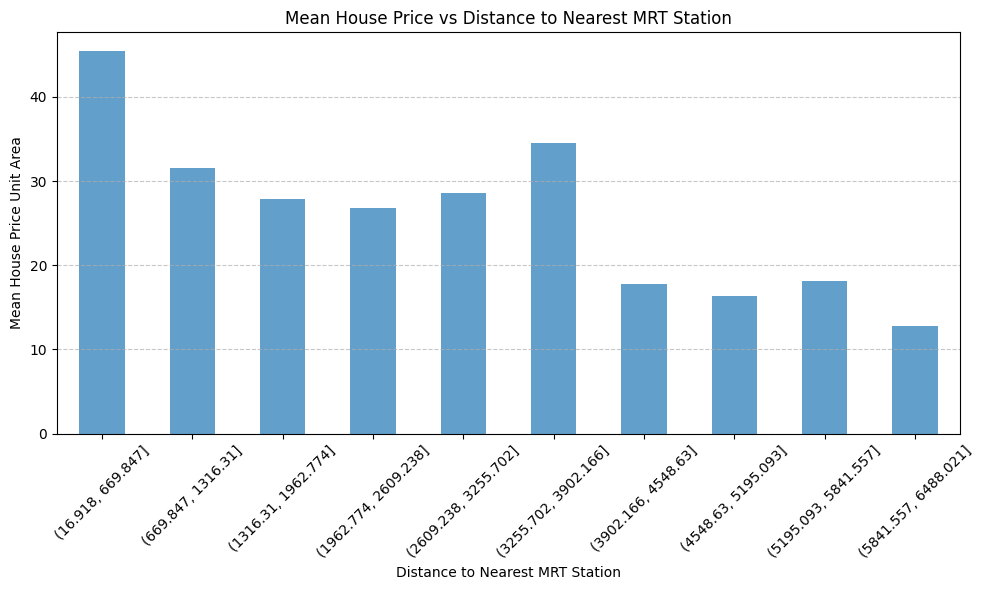

In [17]:
#A bar graph to visualize X3 distance to the nearest MRT station against the Y house price of unit area.

feature = 'X3 distance to the nearest MRT station'
target = 'Y house price of unit area'

# Group data by distance ranges and calculate mean house price for each range
distance_ranges = pd.cut(data[feature], bins=10)
mean_house_price = data.groupby(distance_ranges)[target].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
mean_house_price.plot(kind='bar', alpha=0.7)
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('Mean House Price Unit Area')
plt.title('Mean House Price vs Distance to Nearest MRT Station')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
#Dropping features that will not be helpful in the Predicion.
new_data = data.drop(["No", "X5 latitude", "X6 longitude"], axis=1)
new_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [19]:
#Splitting the Data to Training and Testing Data

from sklearn.model_selection import train_test_split
# Features
X = new_data.drop('Y house price of unit area', axis=1)
# Target variable
y = new_data['Y house price of unit area'] 

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [20]:
#Creating the Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=52)

#Fitting the training Data to the model
DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=52)

In [21]:
#Making predictions
y_pred = DTR.predict(X_test)
y_pred

array([58.8 , 58.8 , 26.5 , 34.6 , 59.  , 15.9 , 20.7 , 51.  , 57.8 ,
       28.5 , 23.1 , 26.9 , 22.8 , 40.5 , 28.6 , 50.2 , 42.8 , 21.5 ,
       52.5 , 52.2 , 48.1 , 49.7 , 37.5 , 28.5 , 40.8 , 44.2 , 26.9 ,
       36.3 , 56.15, 50.2 , 55.3 , 38.9 , 30.8 , 26.5 , 46.7 , 31.3 ,
       63.2 , 68.45, 28.8 , 51.  , 55.  , 39.7 , 34.6 , 40.2 , 11.6 ,
       32.1 , 39.1 , 51.  , 43.7 , 23.  , 44.3 , 43.5 , 36.8 , 49.7 ,
       36.7 , 47.1 , 70.1 , 12.2 , 23.9 , 55.  , 38.1 , 42.8 , 45.1 ,
       28.5 , 31.3 , 49.  , 24.5 , 48.2 , 43.8 , 40.8 , 42.3 , 55.  ,
       51.4 , 28.5 , 44.2 , 56.2 , 29.5 , 43.5 , 49.  , 20.7 , 26.5 ,
       13.7 , 55.  ])

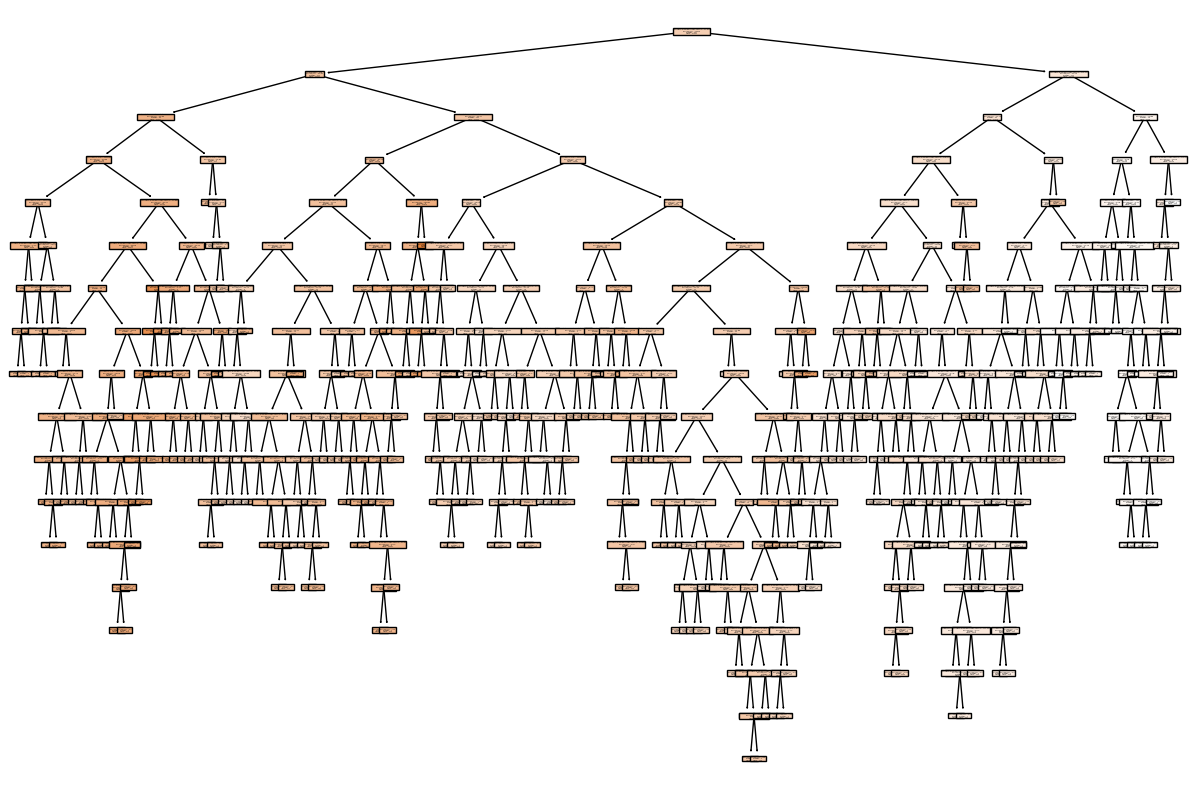

In [22]:
#Plotting the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(DTR, filled=True, feature_names=X.columns)
plt.show()